<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/Agrotech-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Load Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as st


from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model





In [4]:
# Load Agrotech data from the same directory( for simplicity ofcourse.)
data = pd.read_excel(r'Data.xlsx',parse_dates=True,sheet_name=None)


In [5]:
# display keys of data
data.keys()

dict_keys(['plants', 'flight dates', 'planting', 'weather'])

In [6]:
#Edit column names to make sure they can be used for comfortably handling data
plants = data['plants'].rename(columns={"Batch Number": "batch_number", "Plant Date": "plant_date","Class":"class","Fresh Weight (g)": "fresh_weight(g)","Head Weight (g)": "head_weight(g)","Radial Diameter (mm)": "radial_diameter(mm)","Polar Diameter (mm)": "polar_diameter(mm)","Diameter Ratio": "diameter_ratio","Leaves":"leaves","Density (kg/L)": "density(kg/L)","Leaf Area (cm^2)": "leaf_area(cm^2)","Square ID": "square_id","Check Date": "check_date","Flight Date": "flight_date","Remove":"remove"},errors="raise")
#plants = plants.fillna(1)
plants.head()

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),leaf_area(cm^2),square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


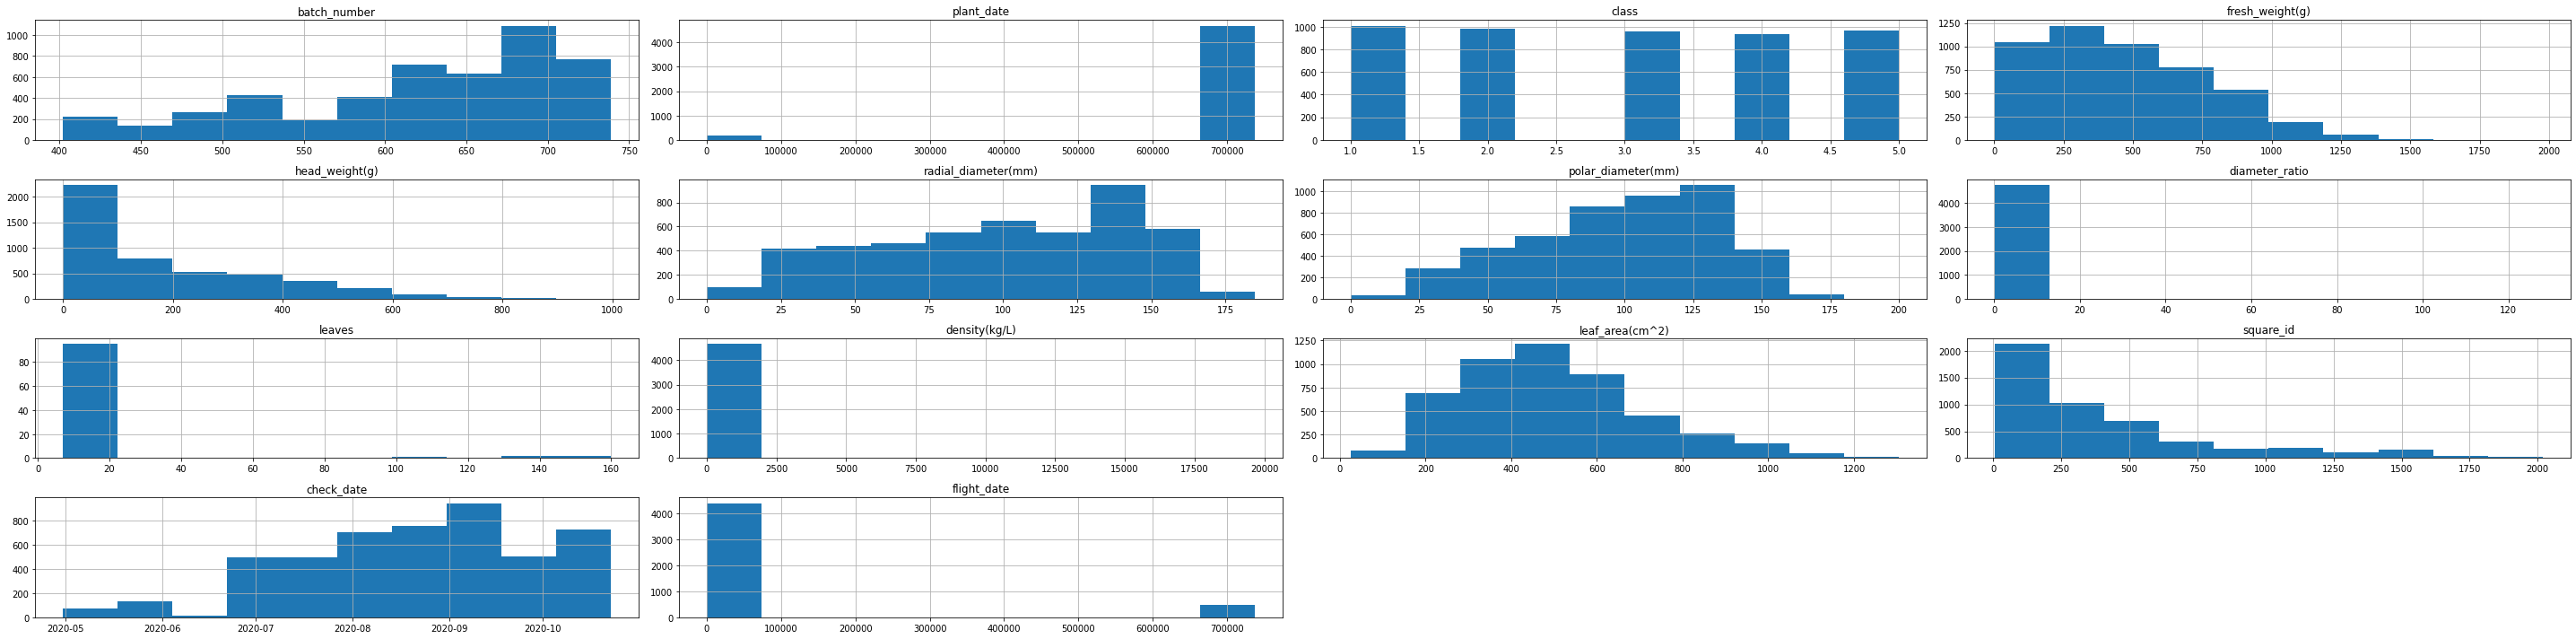

In [50]:
#plot Histogram for Plants Dataset
plants.hist(figsize=(40,10))
plt.tight_layout()
plt.savefig('plantsdata.jpeg')
plt.show()

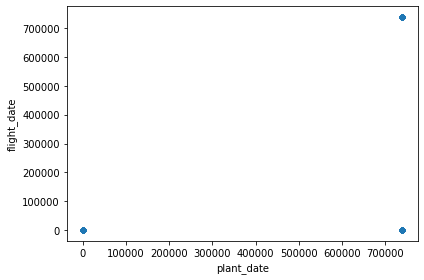

In [51]:
#plot scatterplot for plants dataset focusing plant_date and flight_date
plants.plot.scatter('plant_date','flight_date')
plt.tight_layout()
plt.savefig('plantsflight.jpeg')
plt.show()

In [9]:
#rename columns in flight_dates data set
flight_dates = data['flight dates'].rename(columns={"Batch Number":"batch_number","Flight Date":"flight_date"},errors="raise")
flight_dates.head()                      

,batch_number,flight_date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


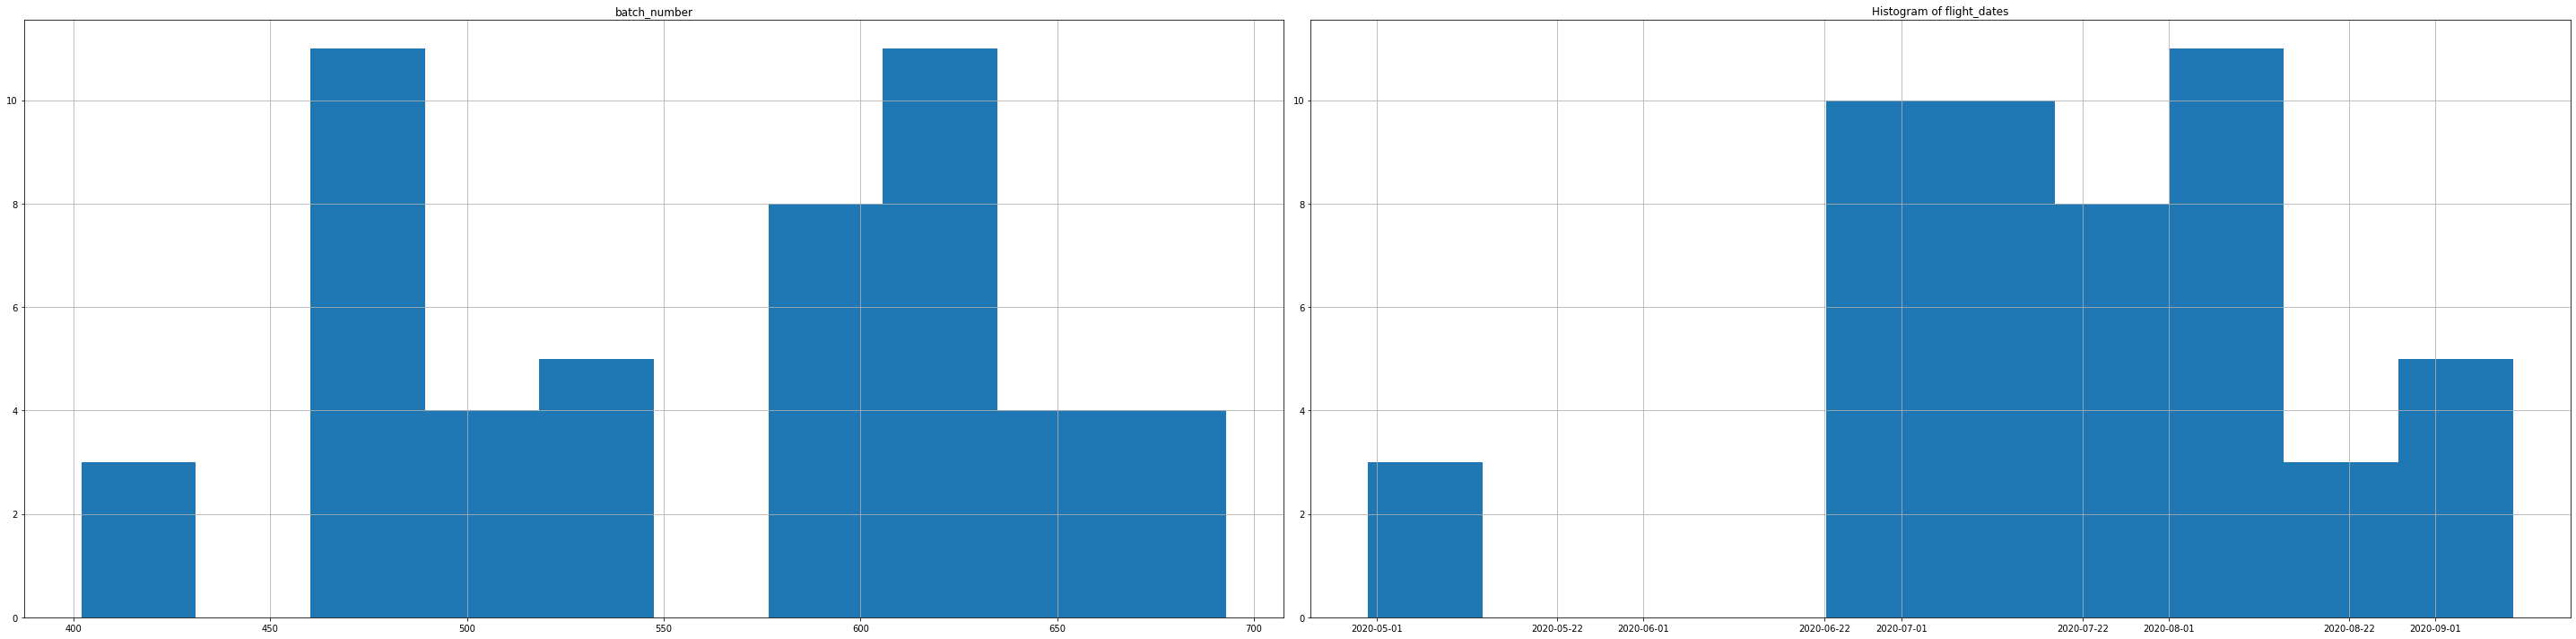

In [52]:
#Plot Histogram of flight_dates
_ = flight_dates.hist(figsize=(40,10))
plt.title('Histogram of flight_dates')
plt.tight_layout()
plt.savefig('flightdata.jpeg')
plt.show()

In [11]:
#rename columns in planting dataset
planting = data['planting'].rename(columns={"Crop":"crop","Column2":"column2","Column3":"column3","Plant_Date":"plant_date","Column1":"column1","Region":"region","Column4":"column4","Planting_Batch":"planting_batch","Volume_Planted":"volume_planted","Planting_Wk":"planting_wk"},errors="raise")
#planting = planting.fillna(1) 
planting.head()

,crop,column2,column3,plant_date,column1,region,column4,planting_batch,volume_planted,planting_wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


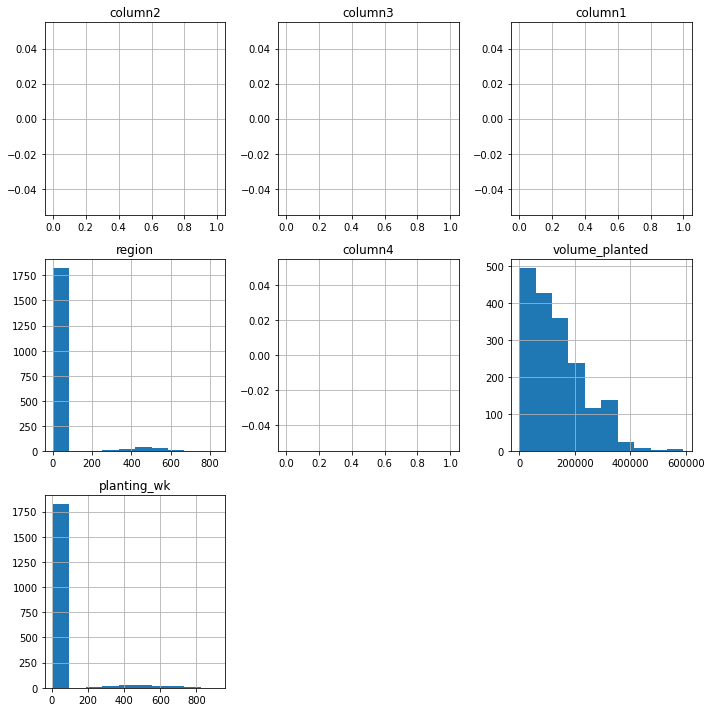

In [53]:
#plot histogram for planting dataset
_ = planting.hist(figsize=(10,10))
plt.tight_layout()
plt.savefig('plantingdata.jpeg')
plt.show()

In [13]:
# rename columns in weather dataset
weather = data['weather'].rename(columns={"Unnamed: 0":"plant_date","Solar Radiation [avg]":"solar_radiation[avg]","Precipitation [sum]":"precipitation[sum]","Wind Speed [avg]":"wind_speed[avg]","Wind Speed [max]":"wind_speed[max]","Battery Voltage [last]":"battery_voltage[last]","Leaf Wetness [time]":"leaf_wetness[time]","Air Temperature [avg]":"air_temperature[avg]","Air Temperature [max]":"air_temperature[max]","Air Temperature [min]":"air_temperature[min]","Relative Humidity [avg]":"relative_humidity[avg]","Dew Point [avg]":"dew_point[avg]","Dew Point [min]":"dew_point[min]","ET0 [result]":"eto[result]"},errors="raise")
#weather = weather.fillna(1)
weather = weather['plant_date'].map(dt.datetime.toordinal)
#pd.to_datetime(weather['plant_date'])
weather.head()

0    735367
1    735368
2    735369
3    735370
4    735371
Name: plant_date, dtype: int64

In [14]:
#Convert weather data into features.
weather_index = weather.keys()
plants_index = plants.keys()
weather_index,plants_index


(RangeIndex(start=0, stop=2556, step=1),
 Index(['batch_number', 'plant_date', 'class', 'fresh_weight(g)',
        'head_weight(g)', 'radial_diameter(mm)', 'polar_diameter(mm)',
        'diameter_ratio', 'leaves', 'density(kg/L)', 'leaf_area(cm^2)',
        'square_id', 'check_date', 'flight_date', 'remove'],
       dtype='object'))

In [15]:
# Figure out how to use date-time features. Most regressors need numerical variables, so you’ll
#need to convert these to some other format. For example, you can create a variable called
#days_to_check that converts flight_date into number of days from plant_date.
pX = plants['plant_date'] = pd.to_datetime(plants['plant_date'])
#Mapping to date time ordinal for calculations and plotting
pX = plants['plant_date']=plants['plant_date'].map(dt.datetime.toordinal)
fy = plants['flight_date'] = pd.to_datetime(plants['flight_date'])
#Mapping to date time ordinal for calculations and plotting
fy = plants['flight_date']=plants['flight_date'].map(dt.datetime.toordinal)



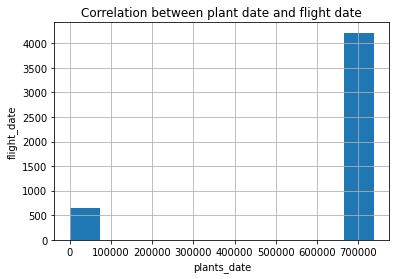

In [54]:
#Correlation between plant date and flight date
days_to_check = pX - fy
_ = days_to_check.hist()
plt.title('Correlation between plant date and flight date')
plt.xlabel('plants_date')
plt.ylabel('flight_date')
plt.savefig('corrplantflight.jpeg')


In [17]:
# Merge Plants and Weather Datasets
frames =[plants,weather]
p_w = pd.concat(frames)
p_w['check_date'].head(),p_w['plant_date'].head()

(0   2020-04-30
 1   2020-04-30
 2   2020-04-30
 3   2020-04-30
 4   2020-04-30
 Name: check_date, dtype: datetime64[ns], 0    737526.0
 1    737526.0
 2    737526.0
 3    737526.0
 4    737526.0
 Name: plant_date, dtype: float64)

In [18]:
# Plants and Weather Datasets
p_w

,0,batch_number,check_date,class,density(kg/L),diameter_ratio,flight_date,fresh_weight(g),head_weight(g),leaf_area(cm^2),leaves,plant_date,polar_diameter(mm),radial_diameter(mm),remove,square_id
0,NaN,402.0,2020-04-30,3.0,NaN,NaN,1.0,15.0,NaN,185.0,10.0,737526.0,NaN,NaN,NaN,208.0
1,NaN,402.0,2020-04-30,4.0,NaN,NaN,1.0,15.0,NaN,156.0,11.0,737526.0,NaN,NaN,NaN,208.0
2,NaN,402.0,2020-04-30,1.0,NaN,NaN,1.0,16.0,NaN,137.0,12.0,737526.0,NaN,NaN,NaN,208.0
3,NaN,402.0,2020-04-30,3.0,NaN,NaN,1.0,15.0,NaN,225.0,10.0,737526.0,NaN,NaN,NaN,208.0
4,NaN,402.0,2020-04-30,3.0,NaN,NaN,1.0,15.0,NaN,157.0,11.0,737526.0,NaN,NaN,NaN,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,737927.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2552,737927.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,737928.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554,737929.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


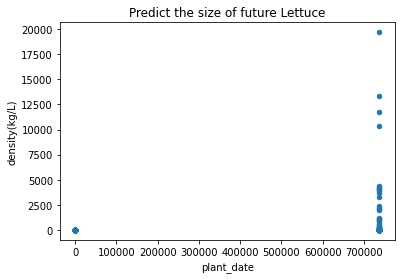

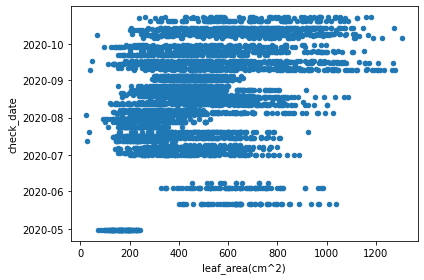

In [55]:
#Predict the size of future Lettuce
p_w.plot.scatter('plant_date','density(kg/L)')
plt.title('Predict the size of future Lettuce')
p_w.plot.scatter('leaf_area(cm^2)','check_date')
plt.tight_layout()
plt.savefig('sizefuturelettuce.jpeg')
plt.show()

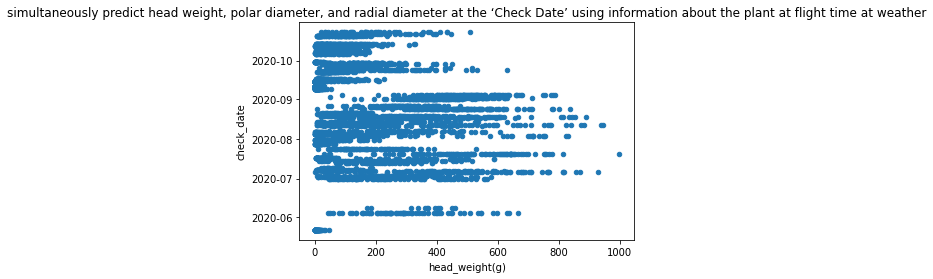

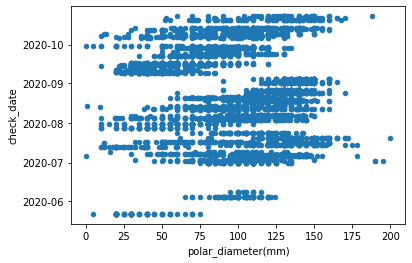

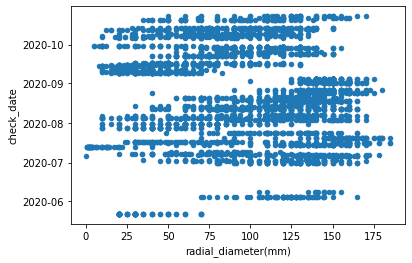

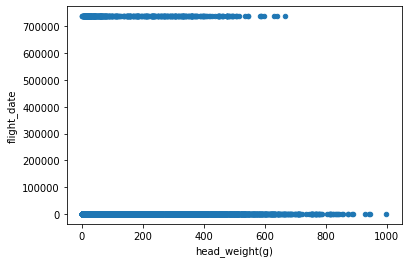

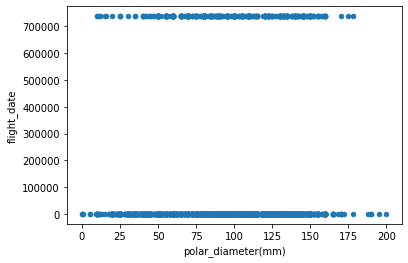

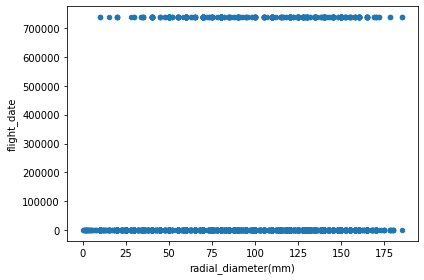

In [56]:
#simultaneously predict head weight, polar diameter, and radial diameter at the ‘Check Date’ using information about the plant at flight time and about the weather.
p_w.plot.scatter('head_weight(g)','check_date')
plt.title('simultaneously predict head weight, polar diameter, and radial diameter at the ‘Check Date’ using information about the plant at flight time at weather')
p_w.plot.scatter('polar_diameter(mm)','check_date')
p_w.plot.scatter('radial_diameter(mm)','check_date')
p_w.plot.scatter('head_weight(g)','flight_date')
p_w.plot.scatter('polar_diameter(mm)','flight_date')
p_w.plot.scatter('radial_diameter(mm)','flight_date')
plt.tight_layout()
plt.savefig('simulpredict.jpeg')
plt.show()

In [21]:
#Merge features you’ve created from the weather data with the plant dataframe so you can use them.
merged = pd.merge(plants,weather,left_on= 'plant_date', right_on= 'plant_date')
merged

,batch_number,plant_date,class,fresh_weight(g),head_weight(g),radial_diameter(mm),polar_diameter(mm),diameter_ratio,leaves,density(kg/L),leaf_area(cm^2),square_id,check_date,flight_date,remove
0,402,737526,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,1,NaN
1,402,737526,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,1,NaN
2,402,737526,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,1,NaN
3,402,737526,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,1,NaN
4,402,737526,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,738,737664,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,1,NaN
4681,738,737664,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,1,NaN
4682,738,737664,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,1,NaN
4683,738,737664,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,1,NaN


<function matplotlib.pyplot.show>

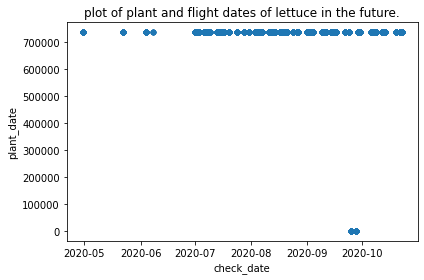

In [58]:
#plot of plant and flight dates of lettuce in the future below.
p_w.plot.scatter('check_date','plant_date')
plt.title('plot of plant and flight dates of lettuce in the future.')
plt.tight_layout()
plt.savefig('plantflightlettuce.jpeg')
plt.show